<a href="https://colab.research.google.com/github/saadan1234/Optical-Network-and-Technologies/blob/main/TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing USA Topology Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

file_path = '/content/drive/MyDrive/DataSet_USA_3k_5k.xlsx'
data = pd.read_excel(file_path)
data.head()

,Power_1,Power_2,Power_3,Power_4,Power_5,Power_6,Power_7,Power_8,Power_9,Power_10,...,GSNR_72,GSNR_73,GSNR_74,GSNR_75,GSNR_76,Source,Destination,No. Spans,Total Distance(m),Number of ON channels
0,0.000000,0.000000,0.000096,0.000096,0.000096,0.000000,0.000096,0.0,0.000096,0.0,...,0.000000,0.000000,26.391513,0.000000,0.000000,trxHouston0,trxJacksonville58,23,2050305.0,26
1,0.000000,0.000096,0.000000,0.000096,0.000000,0.000096,0.000000,0.0,0.000000,0.0,...,0.000000,25.764675,0.000000,0.000000,0.000000,trxHouston0,trxJacksonville58,23,2050305.0,26
2,0.000000,0.000000,0.000000,0.000096,0.000000,0.000000,0.000000,0.0,0.000096,0.0,...,0.000000,0.000000,0.000000,24.616361,24.297057,trxHouston0,trxJacksonville58,23,2050305.0,26
3,0.000096,0.000096,0.000095,0.000095,0.000096,0.000000,0.000000,0.0,0.000096,0.0,...,22.810189,0.000000,0.000000,0.000000,0.000000,trxHouston0,trxJacksonville58,23,2050305.0,26
4,0.000000,0.000000,0.000096,0.000000,0.000096,0.000000,0.000000,0.0,0.000096,0.0,...,21.211149,21.131602,21.349516,22.572032,0.000000,trxHouston0,trxJacksonville58,23,2050305.0,26


# Data Preparation

Correlation Matrix:
                    Power_1     ASE_1     NLI_1  No. Spans  Total Distance(m)  \
Power_1            1.000000 -0.718219  0.842980   0.178908           0.177385   
ASE_1             -0.718219  1.000000 -0.599455   0.258678           0.256875   
NLI_1              0.842980 -0.599455  1.000000   0.436130           0.435520   
No. Spans          0.178908  0.258678  0.436130   1.000000           0.999682   
Total Distance(m)  0.177385  0.256875  0.435520   0.999682           1.000000   
frequency_1             NaN       NaN       NaN        NaN                NaN   
GSNR_1            -0.126005 -0.230735 -0.120139  -0.307360          -0.310768   

                   frequency_1    GSNR_1  
Power_1                    NaN -0.126005  
ASE_1                      NaN -0.230735  
NLI_1                      NaN -0.120139  
No. Spans                  NaN -0.307360  
Total Distance(m)          NaN -0.310768  
frequency_1                NaN       NaN  
GSNR_1                     NaN

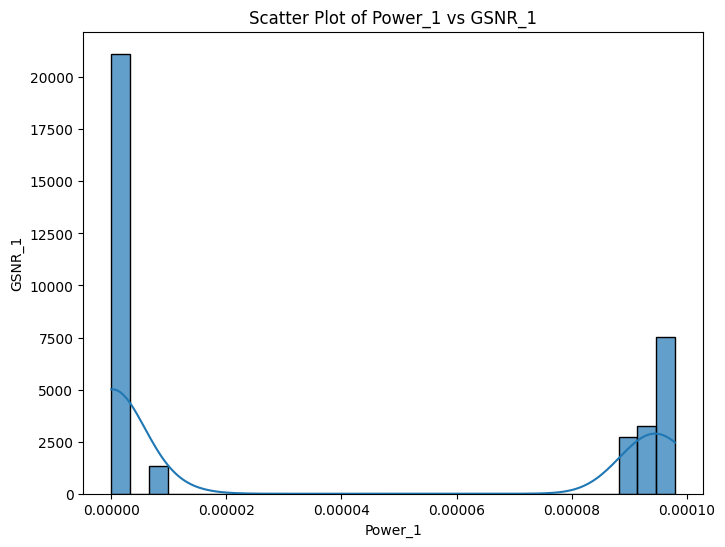

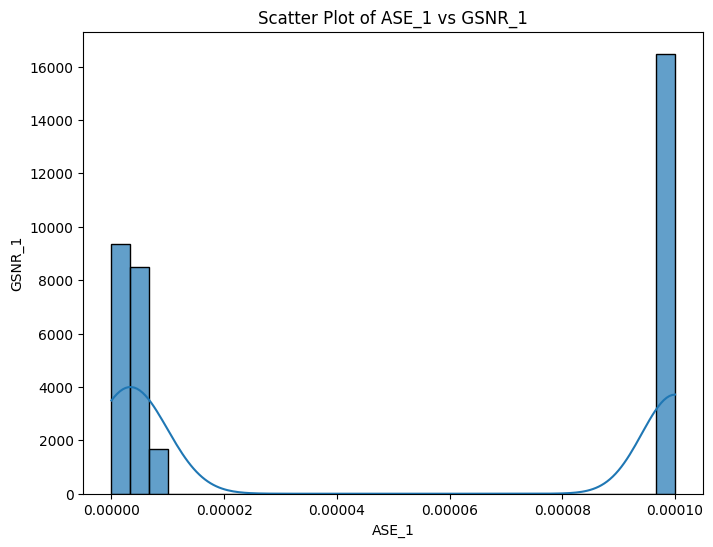

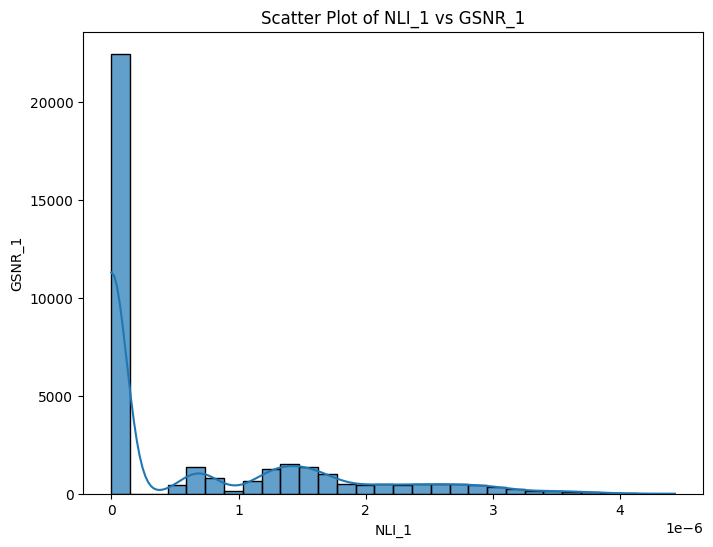

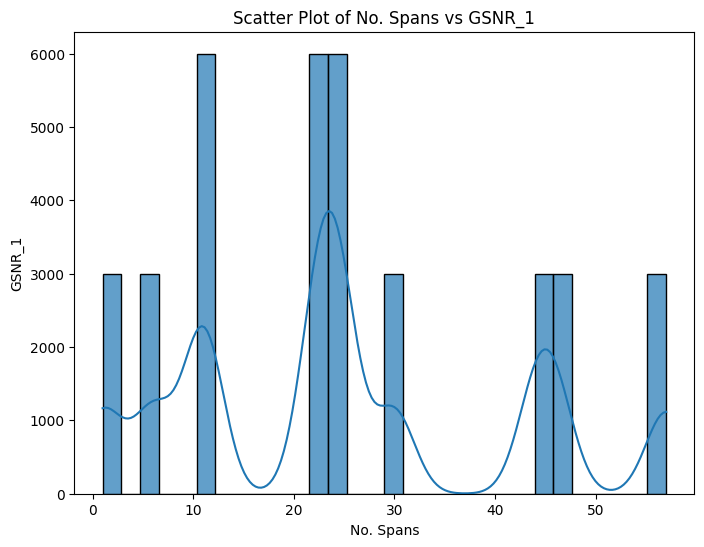

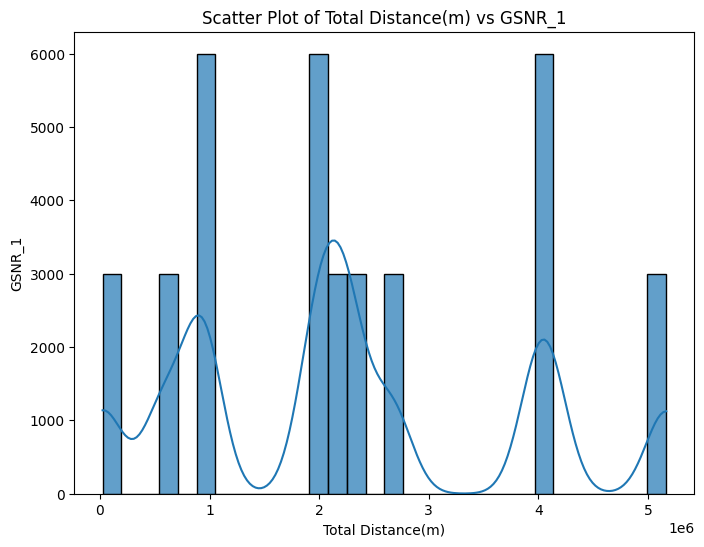

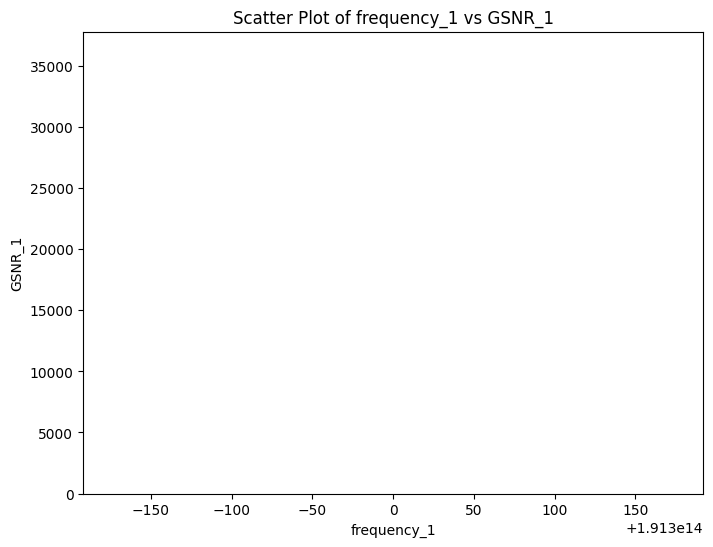

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the attribute columns and the target variable
attribute_columns = [f'Power_{i}' for i in range(1, 2)] + [f'ASE_{i}' for i in range(1, 2)] + [f'NLI_{i}' for i in range(1, 2)]+ ['No. Spans'] + ['Total Distance(m)'] + [f'frequency_{i}' for i in range(1, 2)]
target_column = 'GSNR_1'

# Assuming 'data' is your DataFrame containing attribute columns and the target variable
correlation_matrix = data[attribute_columns + [target_column]].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot histogram plots for each attribute column against the target variable
for column in attribute_columns:
    plt.figure(figsize=(8, 6))
    # sns.scatterplot(data=data, x=column, y=target_column, alpha=0.7)
    sns.histplot(data=data, x=column, kde=True, bins=30, alpha=0.7)
    plt.title(f'Scatter Plot of {column} vs {target_column}')
    plt.xlabel(column)
    plt.ylabel(target_column)
    plt.show()


Empty feature plot tells that all the values of feature column are constant. Thus the feature is redundant and has no use is model training.

# Normalization (USA Dataset)

In [4]:
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler

attribute_columns = [f'Power_{i}' for i in range(1, 77)] + [f'ASE_{i}' for i in range(1, 77)] + [f'NLI_{i}' for i in range(1, 77)]+ ['No. Spans'] + ['Total Distance(m)'] + [f'frequency_{i}' for i in range(1, 77)]

print(len(attribute_columns))

# MinMax Normalization
scaler = MinMaxScaler()
mxdata = scaler.fit_transform(data[attribute_columns])
mxdata = pd.DataFrame(mxdata, columns=attribute_columns)

label = data[target_column].values.reshape(-1, 1)
mydata = scaler.fit_transform(label)
mydata = pd.DataFrame(mydata, columns=[target_column])

# Z-Score Normalization
scaler = StandardScaler()
zxdata = scaler.fit_transform(data[attribute_columns])
zxdata = pd.DataFrame(zxdata, columns=attribute_columns)

zydata = scaler.fit_transform(label)
zydata = pd.DataFrame(zydata, columns=[target_column])

# Display the first few rows of the normalized data
print("MinMax Normalized Data:")
print(mxdata['Power_1'].head(),mxdata['ASE_1'].head(),mxdata['NLI_1'].head(),mxdata['frequency_1'].head(),mxdata['No. Spans'].head(),mxdata['Total Distance(m)'].head())
print(mydata.head())

print("Z-Score Normalized Data:")
print(zxdata['Power_1'].head(),mxdata['ASE_1'].head(),mxdata['NLI_1'].head(),mxdata['frequency_1'].head(),mxdata['No. Spans'].head(),mxdata['Total Distance(m)'].head())
print(zydata.head())

306
MinMax Normalized Data:
0    0.000000
1    0.000000
2    0.000000
3    0.977579
4    0.000000
Name: Power_1, dtype: float64 0    1.000000
1    1.000000
2    1.000000
3    0.025744
4    1.000000
Name: ASE_1, dtype: float64 0    0.00000
1    0.00000
2    0.00000
3    0.37318
4    0.00000
Name: NLI_1, dtype: float64 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: frequency_1, dtype: float64 0    0.392857
1    0.392857
2    0.392857
3    0.392857
4    0.392857
Name: No. Spans, dtype: float64 0    0.39403
1    0.39403
2    0.39403
3    0.39403
4    0.39403
Name: Total Distance(m), dtype: float64
     GSNR_1
0  0.000000
1  0.000000
2  0.000000
3  0.013061
4  0.000000
Z-Score Normalized Data:
0   -0.787327
1   -0.787327
2   -0.787327
3    1.317297
4   -0.787327
Name: Power_1, dtype: float64 0    1.000000
1    1.000000
2    1.000000
3    0.025744
4    1.000000
Name: ASE_1, dtype: float64 0    0.00000
1    0.00000
2    0.00000
3    0.37318
4    0.00000
Name: NLI_1, dtype: float64 0    0.

# Correlation

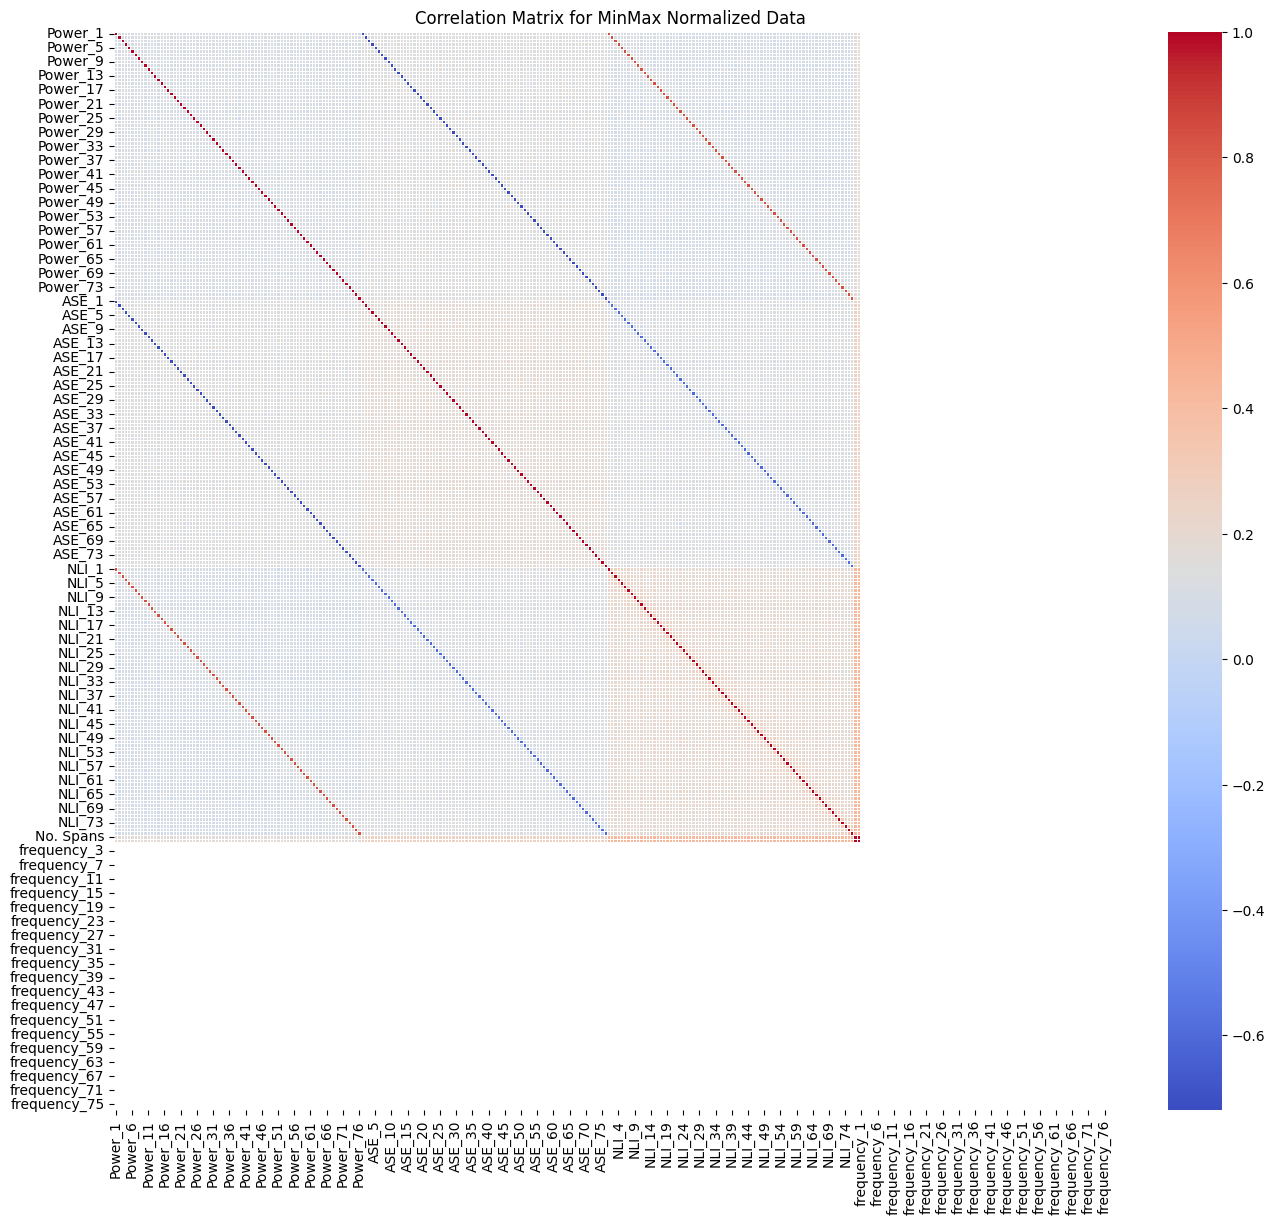

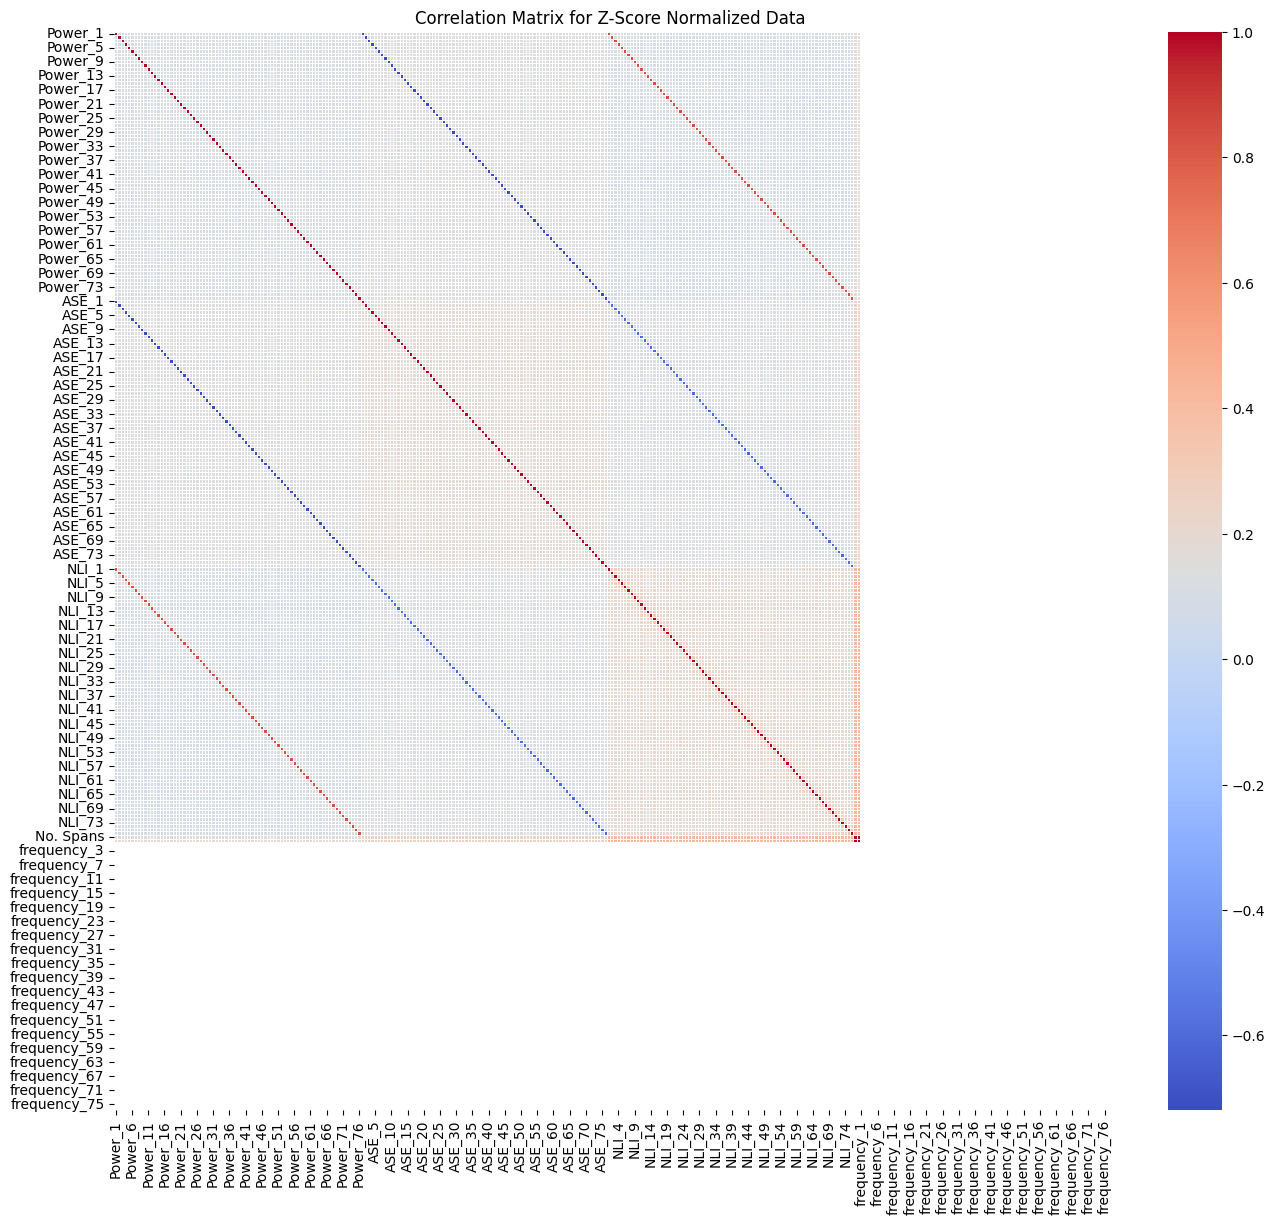

In [5]:
# Compute correlation matrices
# MinMax Normalized Data
minmax_corr_matrix = mxdata.corr()

# Z-Score Normalized Data
zscore_corr_matrix = zxdata.corr()

# Visualize correlation matrices using heatmaps
plt.figure(figsize=(16, 14))
sns.heatmap(minmax_corr_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix for MinMax Normalized Data')
plt.show()

plt.figure(figsize=(16, 14))
sns.heatmap(zscore_corr_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix for Z-Score Normalized Data')
plt.show()

# The empty space at frequency column and row show that there is not any correlation due to constant values of freqency

Empty correlation matrix shows their is no relation between target variable and frequency due to constant values of frequency.

# Train Test Split

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Define the function to split data according to the specified pattern
def custom_train_test_split(data, labels, samples_per_block=3000, train_samples_per_block=2500, test_samples_per_block=500):
    train_data = []
    test_data = []
    train_labels = []
    test_labels = []

    total_samples = len(data)

    for start in range(0, total_samples, samples_per_block):
        end = start + samples_per_block
        train_end = start + train_samples_per_block

        if train_end > total_samples:
            train_end = total_samples
        if end > total_samples:
            end = total_samples

        train_data.append(data[start:train_end])
        test_data.append(data[train_end:end])
        train_labels.append(labels[start:train_end])
        test_labels.append(labels[train_end:end])

    train_data = pd.concat(train_data).reset_index(drop=True)
    test_data = pd.concat(test_data).reset_index(drop=True)
    train_labels = pd.concat(train_labels).reset_index(drop=True)
    test_labels = pd.concat(test_labels).reset_index(drop=True)

    return train_data, test_data, train_labels, test_labels

# Assuming 'zxdata' and 'zydata' are your DataFrames for Z-score normalized data
attribute_columns_without_frequency = [col for col in attribute_columns if not col.startswith('frequency')]
zxdata_train, zxdata_test, zydata_train, zydata_test = custom_train_test_split(zxdata[attribute_columns_without_frequency], zydata[target_column])

# Assuming 'mxdata' and 'mydata' are your DataFrames for MinMax normalized data
mxdata_train, mxdata_test, mydata_train, mydata_test = custom_train_test_split(mxdata[attribute_columns_without_frequency], mydata[target_column])

# Display shapes to verify the split
print("Z-score normalized data:")
print("Train data shape:", zxdata_train.shape)
print("Test data shape:", zxdata_test.shape)
print("Train labels shape:", zydata_train.shape)
print("Test labels shape:", zydata_test.shape)

print("\nMinMax normalized data:")
print("Train data shape:", mxdata_train.shape)
print("Test data shape:", mxdata_test.shape)
print("Train labels shape:", mydata_train.shape)
print("Test labels shape:", mydata_test.shape)


Z-score normalized data:
Train data shape: (30000, 230)
Test data shape: (6000, 230)
Train labels shape: (30000,)
Test labels shape: (6000,)

MinMax normalized data:
Train data shape: (30000, 230)
Test data shape: (6000, 230)
Train labels shape: (30000,)
Test labels shape: (6000,)


# Pre-Trained Model

In [7]:
import tensorflow as tf

# Define the path to save the model
pre_trained_model_path = '/content/drive/MyDrive/models/bestmodel.h5'

# Load pre-trained model
pre_trained_model = tf.keras.models.load_model(pre_trained_model_path)

# Load pre-trained model
pre_trained_modelm = tf.keras.models.load_model(pre_trained_model_path)

# Load pre-trained model
pre_trained_modelz = tf.keras.models.load_model(pre_trained_model_path)

188/188 [==============================] - 0s 1ms/step - loss: 2.8998e-05 - mse: 2.8998e-05
Loss:  2.8997679692110978e-05
MSE:  2.8997679692110978e-05


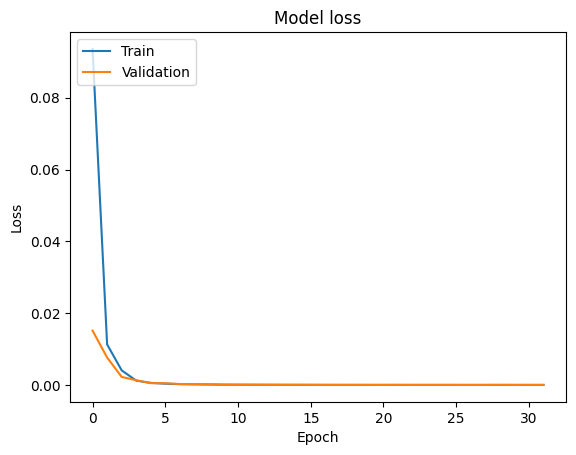

188/188 [==============================] - 0s 2ms/step - loss: 0.7477 - mse: 0.7477
Loss:  0.7476987838745117
MSE:  0.7476987838745117


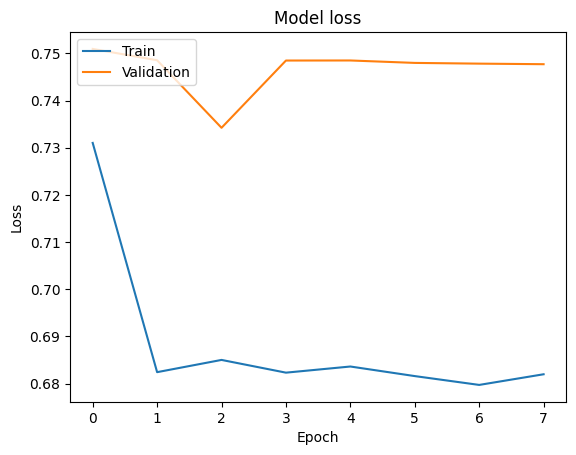

In [8]:
import keras

# Recompile the models
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)  # Smaller learning rate for fine-tuning
pre_trained_modelm.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse'])

# Fit the best model
history = pre_trained_modelm.fit(mxdata_train, mydata_train, epochs=100, batch_size=64, validation_data=(mxdata_test, mydata_test), callbacks=[keras.callbacks.EarlyStopping(patience=5)],verbose=0)

# Evaluate the model
results = pre_trained_modelm.evaluate(mxdata_test, mydata_test)
print("Loss: ", results[0])
print("MSE: ", results[1])

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Recompile the models
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)  # Smaller learning rate for fine-tuning
pre_trained_modelz.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse'])

# Fit the best model
history = pre_trained_modelz.fit(zxdata_train, zydata_train, epochs=100, batch_size=64, validation_data=(zxdata_test, zydata_test), callbacks=[keras.callbacks.EarlyStopping(patience=5)],verbose=0)

# Evaluate the model
results = pre_trained_modelz.evaluate(zxdata_test, zydata_test)
print("Loss: ", results[0])
print("MSE: ", results[1])

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Feature Extraction

**Replacing the output layer of the pretrained model:**

In [9]:
# Clone the pre-trained model
FE_model = tf.keras.models.clone_model(pre_trained_model)
FE_model.set_weights(pre_trained_model.get_weights())

# Freeze all layers except the last one in the cloned model
for layer in FE_model.layers[:-1]:
    layer.trainable = False

# Get the output of the second to last layer
x = FE_model.layers[-2].output

# Add the new last layer
new_output = tf.keras.layers.Dense(1, name="TrainableLayer")(x)

# Create a new model with the modified output
FE_model = tf.keras.models.Model(inputs=FE_model.input, outputs=new_output)

# Print the summary of the modified model
FE_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer1_input (InputLayer)   [(None, 230)]             0         
                                                                 
 Layer1 (Dense)              (None, 64)                14784     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056  

In [10]:
pre_trained_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer1 (Dense)              (None, 64)                14784     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0

188/188 [==============================] - 0s 2ms/step - loss: 0.0125 - mse: 0.0125
Loss:  0.012459853664040565
MSE:  0.012459853664040565


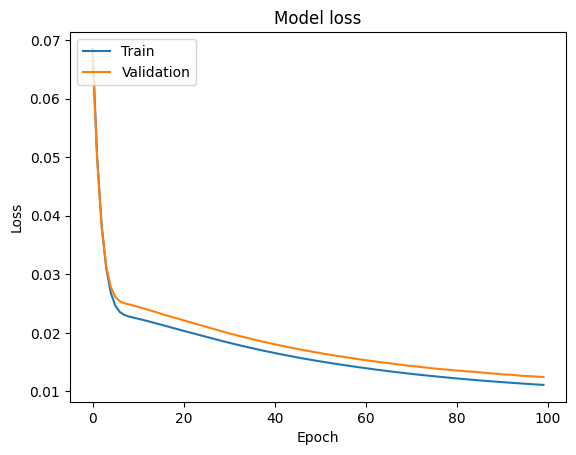

188/188 [==============================] - 0s 2ms/step - loss: 0.9307 - mse: 0.9307
Loss:  0.930694580078125
MSE:  0.930694580078125


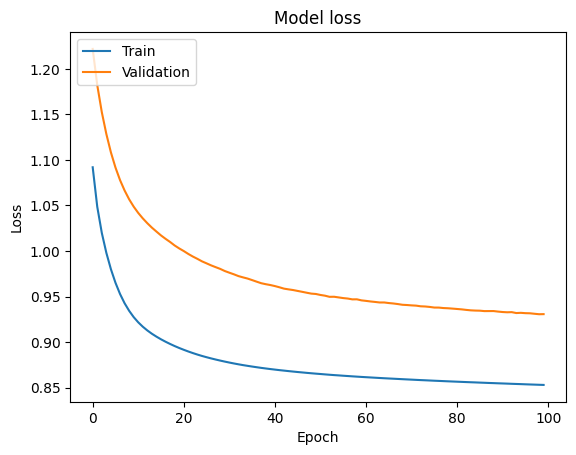

In [11]:
import keras

# Clone the pre-trained model
FE_modelm = tf.keras.models.clone_model(FE_model)
FE_modelm.set_weights(FE_model.get_weights())

# Recompile the models
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)  # Smaller learning rate for fine-tuning
FE_modelm.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse'])

# Fit the best model
history = FE_modelm.fit(mxdata_train, mydata_train, epochs=100, batch_size=64, validation_data=(mxdata_test, mydata_test), callbacks=[keras.callbacks.EarlyStopping(patience=5)],verbose=0)

# Evaluate the model
results = FE_modelm.evaluate(mxdata_test, mydata_test)
print("Loss: ", results[0])
print("MSE: ", results[1])

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Clone the pre-trained model
FE_modelz = tf.keras.models.clone_model(FE_model)
FE_modelz.set_weights(FE_model.get_weights())

# Recompile the models
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)  # Smaller learning rate for fine-tuning
FE_modelz.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse'])

# Fit the best model
history = FE_modelz.fit(zxdata_train, zydata_train, epochs=100, batch_size=64, validation_data=(zxdata_test, zydata_test), callbacks=[keras.callbacks.EarlyStopping(patience=5)],verbose=0)

# Evaluate the model
results = FE_modelz.evaluate(zxdata_test, zydata_test)
print("Loss: ", results[0])
print("MSE: ", results[1])

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Fine Tuning

In [12]:
from tensorflow.keras.models import clone_model


# Clone the fine-tuned model
FT_model = clone_model(pre_trained_model)
FT_model.set_weights(pre_trained_model.get_weights())

# Calculate the number of layers to freeze (half of the layers)
num_layers = len(FT_model.layers)
num_layers_to_freeze = num_layers // 2

# Freeze half of the layers
for layer in FT_model.layers[:num_layers_to_freeze]:
    layer.trainable = False

# Compile the copied model
FT_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the summary of the modified model
FT_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer1 (Dense)              (None, 64)                14784     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0

188/188 [==============================] - 0s 2ms/step - loss: 2.5936e-04 - mse: 2.5936e-04
Loss:  0.0002593552053440362
MSE:  0.0002593552053440362


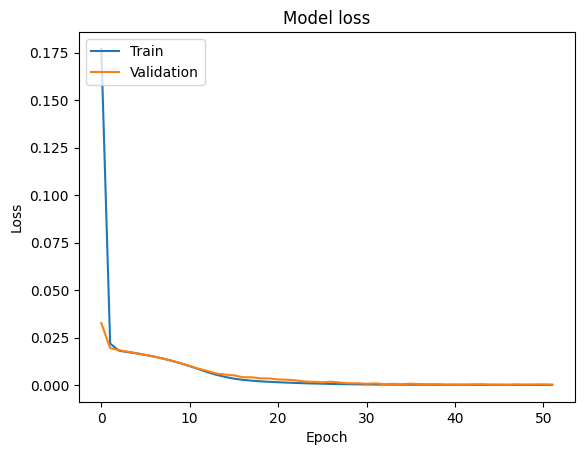

188/188 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013
Loss:  0.0013326079351827502
MSE:  0.0013326079351827502


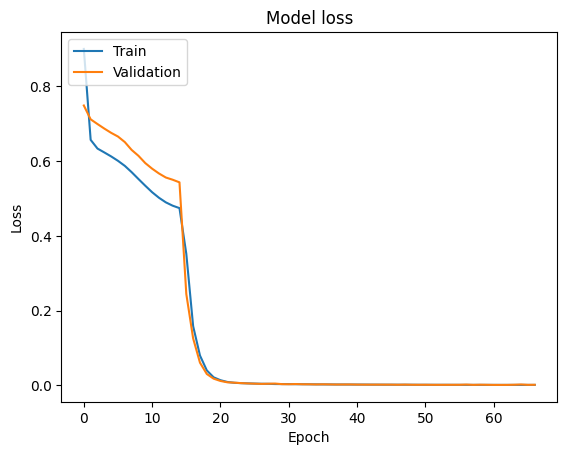

In [13]:
# Clone the pre-trained model
FT_modelm = tf.keras.models.clone_model(FT_model)
FT_modelm.set_weights(FT_model.get_weights())

# Recompile the models
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)  # Smaller learning rate for fine-tuning
FT_modelm.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse'])

# Fit the best model
history = FT_modelm.fit(mxdata_train, mydata_train, epochs=100, batch_size=64, validation_data=(mxdata_test, mydata_test), callbacks=[keras.callbacks.EarlyStopping(patience=5)],verbose=0)

# Evaluate the model
results = FT_modelm.evaluate(mxdata_test, mydata_test)
print("Loss: ", results[0])
print("MSE: ", results[1])

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Clone the pre-trained model
FT_modelz = tf.keras.models.clone_model(FT_model)
FT_modelz.set_weights(FT_model.get_weights())

# Recompile the models
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)  # Smaller learning rate for fine-tuning
FT_modelz.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse'])

# Fit the best model
history = FT_modelz.fit(zxdata_train, zydata_train, epochs=100, batch_size=64, validation_data=(zxdata_test, zydata_test), callbacks=[keras.callbacks.EarlyStopping(patience=5)],verbose=0)

# Evaluate the model
results = FT_modelz.evaluate(zxdata_test, zydata_test)
print("Loss: ", results[0])
print("MSE: ", results[1])

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# **Loss Comparison:**

## Min-Max Normalized Data:

Pre-trained Model: 0.00002

Feature Extraction Model (Last Trainable Layer): 0.01245

Fine Tuned Model (Half Trainable Layers): 0.00025

## Z-Score Normalized Data:

Pre-trained Model: 0.74769

Feature Extraction Model (Last Trainable Layer): 0.93069

Fine Tuned Model (Half Trainable Layers): 0.00133




The above loss values suggest:

**Normalization Techniques:**

The choice of normalization technique significantly impacts model performance, especially in feature extraction and fine-tuning scenarios as minmax normalized data performed better in all cases.



# Model Ouput on Single Prediction

In [14]:
import warnings
import numpy as np

value = 2291
# Suppress specific warnings
warnings.filterwarnings("ignore", category=Warning)

print("\nSingle input predictions pretrained Model (MinMax Normalized Data):")

# MinMax Normalized DataZ
single_input_minmax = mxdata_test.iloc[value]  # Using .iloc to get the first row
single_input_minmax = np.array(single_input_minmax).reshape(1, 230)
print("Actual Value:", mydata_test.iloc[value])  # Assuming mydata_test contains actual values

# Making prediction
prediction_minmax = pre_trained_modelm.predict(single_input_minmax)
predicted_value_minmax = prediction_minmax[0][0]  # Extracting the scalar prediction from the 2D array
print(f"Neural Network Output: Prediction = {predicted_value_minmax:.6f}")

print("\nSingle input predictions Feature Extraction Model (MinMax Normalized Data):")

# MinMax Normalized DataZ
single_input_minmax = mxdata_test.iloc[value]  # Using .iloc to get the first row
single_input_minmax = np.array(single_input_minmax).reshape(1, 230)
print("Actual Value:", mydata_test.iloc[value])  # Assuming mydata_test contains actual values

# Making prediction
prediction_minmax = FE_modelm.predict(single_input_minmax)
predicted_value_minmax = prediction_minmax[0][0]  # Extracting the scalar prediction from the 2D array
print(f"Neural Network Output: Prediction = {predicted_value_minmax:.6f}")

print("\nSingle input predictions Fine Tuned Model (MinMax Normalized Data):")

# MinMax Normalized DataZ
single_input_minmax = mxdata_test.iloc[value]  # Using .iloc to get the first row
single_input_minmax = np.array(single_input_minmax).reshape(1, 230)
print("Actual Value:", mydata_test.iloc[value])  # Assuming mydata_test contains actual values

# Making prediction
prediction_minmax = FT_modelm.predict(single_input_minmax)
predicted_value_minmax = prediction_minmax[0][0]  # Extracting the scalar prediction from the 2D array
print(f"Neural Network Output: Prediction = {predicted_value_minmax:.6f}")

print("\nSingle input predictions pretrained Model (Z-Score Normalized Data):")

# MinMax Normalized DataZ
single_input_minmax = zxdata_test.iloc[value]  # Using .iloc to get the first row
single_input_minmax = np.array(single_input_minmax).reshape(1, 230)
print("Actual Value:", zydata_test.iloc[value])  # Assuming mydata_test contains actual values

# Making prediction
prediction_minmax = pre_trained_modelz.predict(single_input_minmax)
predicted_value_minmax = prediction_minmax[0][0]  # Extracting the scalar prediction from the 2D array
print(f"Neural Network Output: Prediction = {predicted_value_minmax:.6f}")

print("\nSingle input predictions Feature Extraction Model (Z-Score Normalized Data):")

# MinMax Normalized DataZ
single_input_minmax = zxdata_test.iloc[value]  # Using .iloc to get the first row
single_input_minmax = np.array(single_input_minmax).reshape(1, 230)
print("Actual Value:", zydata_test.iloc[value])  # Assuming mydata_test contains actual values

# Making prediction
prediction_minmax = FE_modelz.predict(single_input_minmax)
predicted_value_minmax = prediction_minmax[0][0]  # Extracting the scalar prediction from the 2D array
print(f"Neural Network Output: Prediction = {predicted_value_minmax:.6f}")

print("\nSingle input predictions Fine Tuned Model (Z-Score Normalized Data):")

# MinMax Normalized DataZ
single_input_minmax = zxdata_test.iloc[value]  # Using .iloc to get the first row
single_input_minmax = np.array(single_input_minmax).reshape(1, 230)
print("Actual Value:", zydata_test.iloc[value])  # Assuming mydata_test contains actual values

# Making prediction
prediction_minmax = FT_modelz.predict(single_input_minmax)
predicted_value_minmax = prediction_minmax[0][0]  # Extracting the scalar prediction from the 2D array
print(f"Neural Network Output: Prediction = {predicted_value_minmax:.6f}")


Single input predictions pretrained Model (MinMax Normalized Data):
Actual Value: 0.0108264849939173
1/1 [==============================] - 0s 251ms/step
Neural Network Output: Prediction = 0.010875

Single input predictions Feature Extraction Model (MinMax Normalized Data):
Actual Value: 0.0108264849939173
1/1 [==============================] - 0s 149ms/step
Neural Network Output: Prediction = 0.022532

Single input predictions Fine Tuned Model (MinMax Normalized Data):
Actual Value: 0.0108264849939173
1/1 [==============================] - 0s 155ms/step
Neural Network Output: Prediction = 0.013149

Single input predictions pretrained Model (Z-Score Normalized Data):
Actual Value: -0.17397422678126293
1/1 [==============================] - 0s 141ms/step
Neural Network Output: Prediction = -0.174914

Single input predictions Feature Extraction Model (Z-Score Normalized Data):
Actual Value: -0.17397422678126293


1/1 [==============================] - 0s 177ms/step
Neural Network Output: Prediction = -0.103721

Single input predictions Fine Tuned Model (Z-Score Normalized Data):
Actual Value: -0.17397422678126293


1/1 [==============================] - 0s 149ms/step
Neural Network Output: Prediction = -0.177828


In [15]:
import warnings
import numpy as np

value = 5121
# Suppress specific warnings
warnings.filterwarnings("ignore", category=Warning)

print("\nSingle input predictions pretrained Model (MinMax Normalized Data):")

# MinMax Normalized DataZ
single_input_minmax = mxdata_test.iloc[value]  # Using .iloc to get the first row
single_input_minmax = np.array(single_input_minmax).reshape(1, 230)
print("Actual Value:", mydata_test.iloc[value])  # Assuming mydata_test contains actual values

# Making prediction
prediction_minmax = pre_trained_modelm.predict(single_input_minmax)
predicted_value_minmax = prediction_minmax[0][0]  # Extracting the scalar prediction from the 2D array
print(f"Neural Network Output: Prediction = {predicted_value_minmax:.6f}")

print("\nSingle input predictions Feature Extraction Model (MinMax Normalized Data):")

# MinMax Normalized DataZ
single_input_minmax = mxdata_test.iloc[value]  # Using .iloc to get the first row
single_input_minmax = np.array(single_input_minmax).reshape(1, 230)
print("Actual Value:", mydata_test.iloc[value])  # Assuming mydata_test contains actual values

# Making prediction
prediction_minmax = FE_modelm.predict(single_input_minmax)
predicted_value_minmax = prediction_minmax[0][0]  # Extracting the scalar prediction from the 2D array
print(f"Neural Network Output: Prediction = {predicted_value_minmax:.6f}")

print("\nSingle input predictions Fine Tuned Model (MinMax Normalized Data):")
s
# MinMax Normalized DataZ
single_input_minmax = mxdata_test.iloc[value]  # Using .iloc to get the first row
single_input_minmax = np.array(single_input_minmax).reshape(1, 230)
print("Actual Value:", mydata_test.iloc[value])  # Assuming mydata_test contains actual values

# Making prediction
prediction_minmax = FT_modelm.predict(single_input_minmax)
predicted_value_minmax = prediction_minmax[0][0]  # Extracting the scalar prediction from the 2D array
print(f"Neural Network Output: Prediction = {predicted_value_minmax:.6f}")

print("\nSingle input predictions pretrained Model (Z-Score Normalized Data):")

# MinMax Normalized DataZ
single_input_minmax = zxdata_test.iloc[value]  # Using .iloc to get the first row
single_input_minmax = np.array(single_input_minmax).reshape(1, 230)
print("Actual Value:", zydata_test.iloc[value])  # Assuming mydata_test contains actual values

# Making prediction
prediction_minmax = pre_trained_modelz.predict(single_input_minmax)
predicted_value_minmax = prediction_minmax[0][0]  # Extracting the scalar prediction from the 2D array
print(f"Neural Network Output: Prediction = {predicted_value_minmax:.6f}")

print("\nSingle input predictions Feature Extraction Model (Z-Score Normalized Data):")

# MinMax Normalized DataZ
single_input_minmax = zxdata_test.iloc[value]  # Using .iloc to get the first row
single_input_minmax = np.array(single_input_minmax).reshape(1, 230)
print("Actual Value:", zydata_test.iloc[value])  # Assuming mydata_test contains actual values

# Making prediction
prediction_minmax = FE_modelz.predict(single_input_minmax)
predicted_value_minmax = prediction_minmax[0][0]  # Extracting the scalar prediction from the 2D array
print(f"Neural Network Output: Prediction = {predicted_value_minmax:.6f}")

print("\nSingle input predictions Fine Tuned Model (Z-Score Normalized Data):")

# MinMax Normalized DataZ
single_input_minmax = zxdata_test.iloc[value]  # Using .iloc to get the first row
single_input_minmax = np.array(single_input_minmax).reshape(1, 230)
print("Actual Value:", zydata_test.iloc[value])  # Assuming mydata_test contains actual values

# Making prediction
prediction_minmax = FT_modelz.predict(single_input_minmax)
predicted_value_minmax = prediction_minmax[0][0]  # Extracting the scalar prediction from the 2D array
print(f"Neural Network Output: Prediction = {predicted_value_minmax:.6f}")


Single input predictions pretrained Model (MinMax Normalized Data):
Actual Value: 0.01165378067066543
1/1 [==============================] - 0s 30ms/step
Neural Network Output: Prediction = 0.013209

Single input predictions Feature Extraction Model (MinMax Normalized Data):
Actual Value: 0.01165378067066543
1/1 [==============================] - 0s 30ms/step
Neural Network Output: Prediction = 0.033159

Single input predictions Fine Tuned Model (MinMax Normalized Data):
Actual Value: 0.01165378067066543
1/1 [==============================] - 0s 33ms/step
Neural Network Output: Prediction = 0.017661

Single input predictions pretrained Model (Z-Score Normalized Data):
Actual Value: -0.16934918330812662
1/1 [==============================] - 0s 18ms/step
Neural Network Output: Prediction = -0.168512

Single input predictions Feature Extraction Model (Z-Score Normalized Data):
Actual Value: -0.16934918330812662
1/1 [==============================] - 0s 18ms/step
Neural Network Output: P

# Prediction Comparison

**Analysis of above predictions suggests:**

1) Pre-Trained Model model on MinMax-Normalized data gives most accurate results. If there would have been difference in values or data then pre-trained model would have performed worse.

2) Feature Extraction Model works fairly good on both normalization datas.

3) Fine Tunes Model gives consistently accurate results for both normalization
datas.